In [358]:
import json
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

import numpy as np 


#to avoid plots not showing up
import plotly.io as pio
pio.renderers.default='notebook'

warnings.filterwarnings('ignore')

import seaborn as sns 
sns.set(style='darkgrid')

In [181]:
feb = pd.read_csv('../data/feb_trained.csv')
march = pd.read_csv('../data/march_trained.csv')
april = pd.read_csv('../data/april_trained.csv')
may = pd.read_csv('../data/may_trained.csv')
to_append = pd.read_csv('../data/append.csv') #added missign dates march27-29
append_2  = pd.read_csv('../data/append_march31.csv') #add march 31st
cuomo_df = pd.read_csv('../data/cuomo_tweets.csv')

In [18]:
#covid counts by day in New York State
daily_counts = pd.read_csv('../data/daily_counts.csv')
daily_counts['DATE_OF_INTEREST'] =  pd.to_datetime(daily_counts['DATE_OF_INTEREST'],
                                                   infer_datetime_format=True)  

In [4]:
frames = [feb,march,april,may, to_append, append_2]
df = pd.concat(frames, ignore_index=True)

In [10]:
df.sentiment_value.value_counts()

NEGATIVE    207322
POSITIVE    120572
Name: sentiment_value, dtype: int64

In [5]:
#converting all the negative sentiments to '-'ve 
df.loc[df.sentiment_value == 'NEGATIVE', 'score'] = -1 * df.score   
#for above 0.8 threshold for negativity
df.loc[df.score <= -0.8, 'polarity'] = -1 

#for positive polarity threshold
df.loc[df.score >= 0.8, 'polarity'] = 1 

#rest are neutral, polarity = 0 
df['polarity'] = df['polarity'].fillna(0)

In [6]:
df.polarity.value_counts()

-1.0    183163
 1.0     97537
 0.0     47194
Name: polarity, dtype: int64

In [183]:
#fix schemas to datetime
df['timestamp'] =  pd.to_datetime(df['timestamp'], infer_datetime_format=True)  
cuomo_df['timestamp'] =  pd.to_datetime(cuomo_df['timestamp'], infer_datetime_format=True)  

In [359]:
import plotly.express as px

total_tweets = df.groupby(                                        \
      [pd.Grouper(key='timestamp', freq='D')]).size().rename('count').reset_index() 


fig = px.line(total_tweets[(total_tweets['timestamp'] > '02/29/2020')] , 
                              x='timestamp',y="count",
                              title='total tweet counts by Day')

fig.show()

In [230]:
import plotly.express as px

fig = px.bar(total_tweets, y='count', x='timestamp', text='count')

fig.show()

In [254]:
ax.legend?

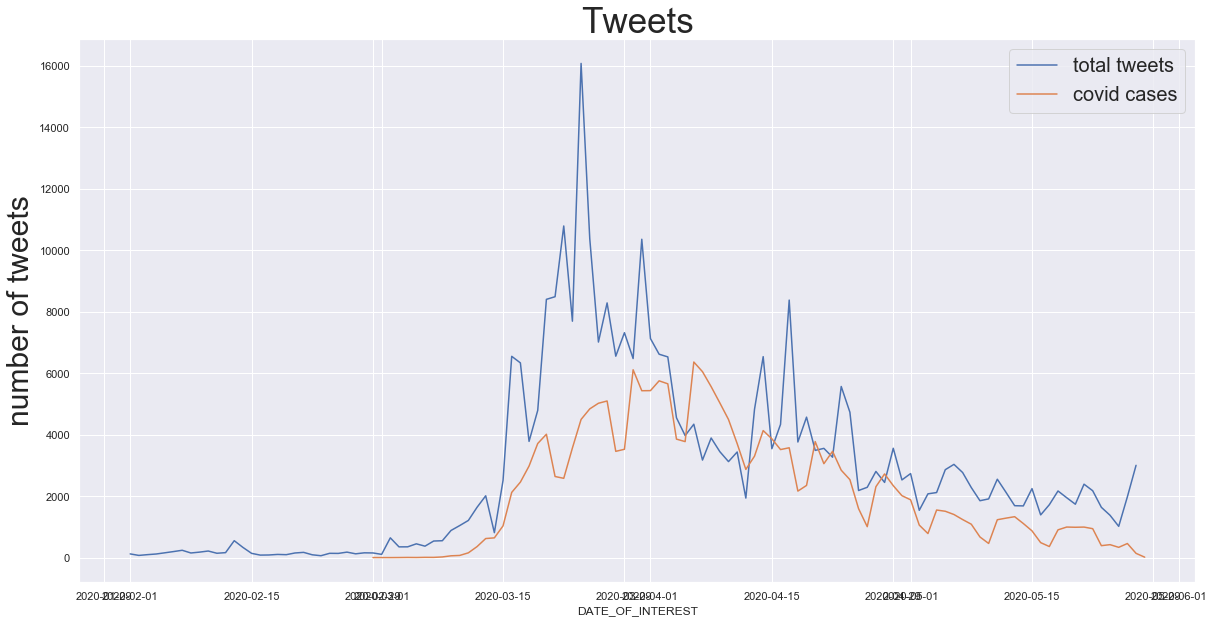

In [256]:
fig, ax = plt.subplots(figsize = (20,10))
ax1 = sns.lineplot(x="timestamp", y="count",label="total tweets",data=total_tweets)
ax2 = sns.lineplot(x='DATE_OF_INTEREST',y="CASE_COUNT",label="covid cases", data=daily_counts)
ax1.set_title("Tweets", fontsize=35)
ax1.set_ylabel("number of tweets", fontsize=30)
ax.legend(fontsize=20)
#ax2.set_title("covid cases", fontsize=35)

In [100]:
result_by_day = df.groupby(                                        \
      [pd.Grouper(key='timestamp', freq='D'), 'polarity']).size().rename('count').reset_index() 

In [102]:
result_by_day.polarity.value_counts() 

 1.0    117
 0.0    117
-1.0    117
Name: polarity, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.lineplot(x="timestamp", y="count", data=total_tweets)
fig.autofmt_xdate()
x = total_tweets['timestamp'].values 
y = total_tweets['count'].values
plt.fill_between(x, y)

plt.tight_layout()
plt.show()



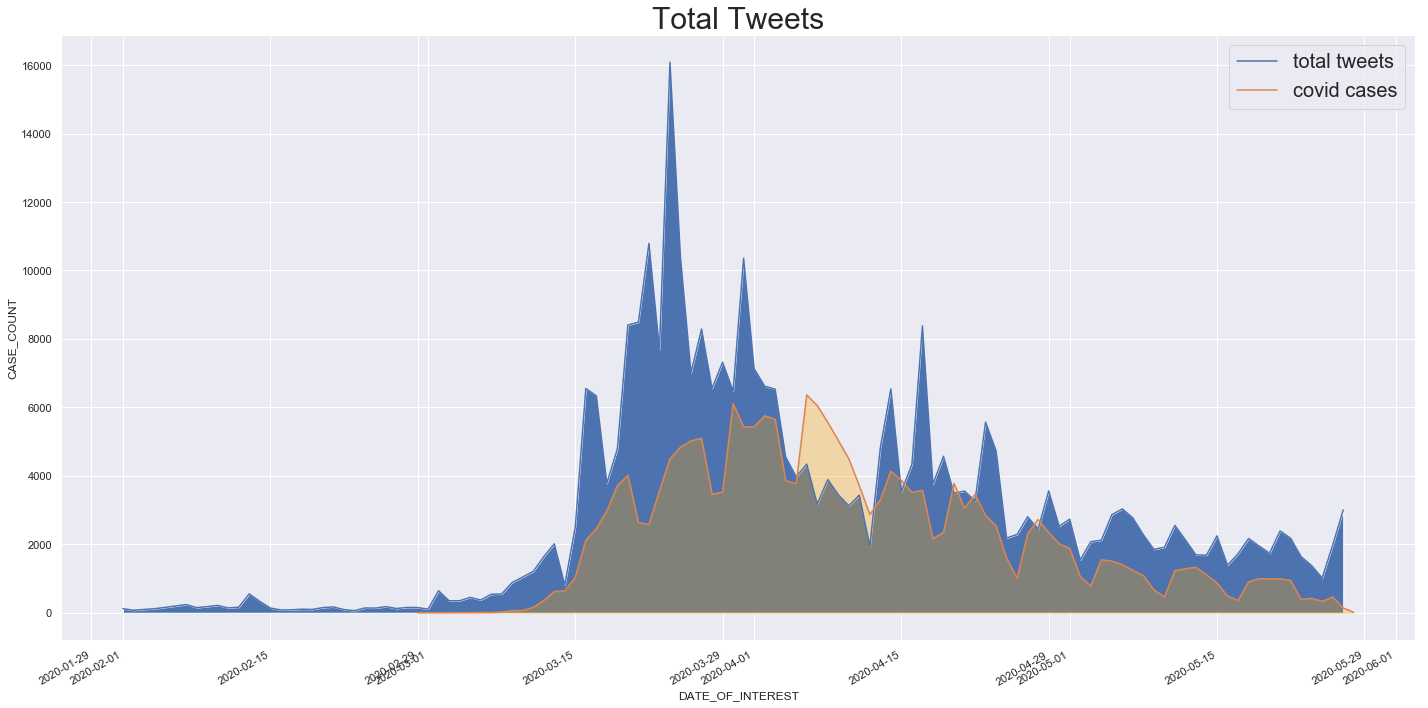

In [349]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x="timestamp", y="count", label='total tweets', data=total_tweets)
sns.lineplot(x='DATE_OF_INTEREST',y="CASE_COUNT",label="covid cases", data=daily_counts)
fig.autofmt_xdate()
x = total_tweets['timestamp'].values 
y = total_tweets['count'].values
plt.fill_between(x, y)

x2 = daily_counts['DATE_OF_INTEREST'].values
y2 = daily_counts['CASE_COUNT'].values
plt.fill_between(x2, y2, color = 'orange', alpha=0.3)

ax.set_title('Total Tweets', fontsize=30)
ax.legend(fontsize=20)
plt.tight_layout()
plt.show()


In [320]:
result_by_day.loc[result_by_day['sentiment'] =='Negative']['count'].values

array([  78,   40,   60,   70,   95,  122,  172,  101,  118,  146,   87,
        114,  365,  254,   74,   49,   56,   69,   52,   87,  110,   53,
         35,   80,   84,  115,   74,   90,   75,   63,  383,  229,  229,
        302,  247,  338,  353,  561,  627,  809, 1080, 1110,  502, 1497,
       3645, 3021, 1936, 2355, 4070, 3500, 5073, 3635, 7928, 5356, 3651,
       4309, 3760, 4008, 3751, 5299, 4108, 3337, 3738, 2726, 2291, 2700,
       1899, 2326, 1735, 1814, 2130, 1082, 2605, 3771, 2095, 2642, 4629,
       2229, 2474, 2121, 2030, 1909, 3158, 2427, 1286, 1345, 1840, 1523,
       1922, 1478, 1773,  955, 1131, 1292, 1722, 1857, 1887, 1452, 1170,
       1096, 1623, 1379, 1032, 1003, 1427,  900, 1009, 1428, 1275, 1148,
       1601, 1532, 1081,  881,  645, 1242, 1700])

'\nThis function converts the instances in the dates to fit into a graph\nto represent the density of the tweets by the hour.\n'

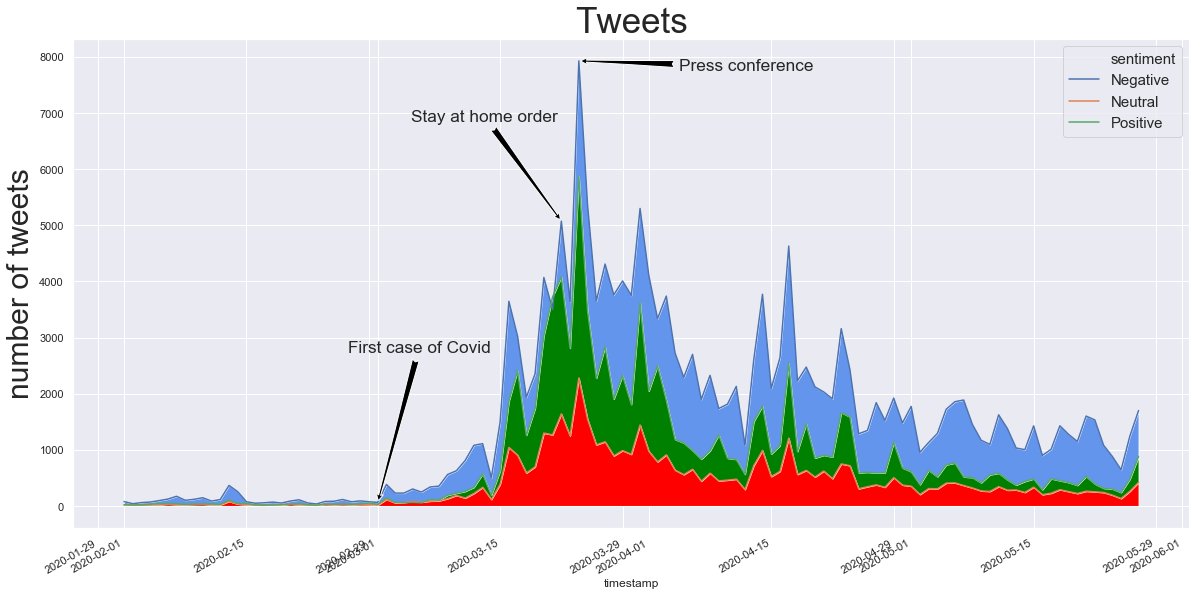

In [351]:
def annontate_date(date,title,text_x,text_y):
    date = date
    number = result_by_day[(result_by_day.timestamp == date)
                  & (result_by_day.sentiment == 'Negative')].iloc[0]['count']

    #number = result_by_day[result_by_day.timestamp == date].value
    ax.annotate(title, xy=(date, number), xytext=(text_x,text_y),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="fancy",facecolor='black'),#, shrink=0.05),
                clip_on=True, size = 'x-large')
    
result_by_day.loc[result_by_day['polarity'] == -1 ,'sentiment'] = 'Negative'
result_by_day.loc[result_by_day['polarity'] == 1 ,'sentiment'] = 'Positive'
result_by_day.loc[result_by_day['polarity'] == 0 ,'sentiment'] = 'Neutral'
fig, ax = plt.subplots(figsize = (20,10))

ax = sns.lineplot(x="timestamp", y="count", hue='sentiment',
                  data=result_by_day)

annontate_date('2020-03-01','First case of Covid', -30 , 150)
annontate_date('2020-03-22','Stay at home order', -150 , 100)
annontate_date('2020-03-24','Press conference', 100 , -10)

ax.set_title("Tweets", fontsize=35)
ax.set_ylabel("number of tweets", fontsize=30)
#ax.fig.autofmt_xdate()
#plt.fill_between(result_by_month.timestamp, result_by_month.count)
#plt.fill_between(df.Date.values, df.Data.values)
ax.legend(fontsize=15)
fig.autofmt_xdate()

#for filling colors

y1 =result_by_day.loc[result_by_day['sentiment'] =='Negative']['count'].values
y2 = result_by_day.loc[result_by_day['sentiment'] =='Positive']['count'].values 
y3 = result_by_day.loc[result_by_day['sentiment'] =='Neutral']['count'].values

plt.fill_between(x,y1 , facecolor='cornflowerblue')
plt.fill_between(x,y2 , facecolor='green')
plt.fill_between(x,y3 , facecolor='red')
"""
This function converts the instances in the dates to fit into a graph
to represent the density of the tweets by the hour.
"""    

# New York governor Andrew Cuomo gives coronavirus update -- March 24, 2020
# Upload Time (UTC): 15:58:48 
# https://www.youtube.com/watch?v=S0k5k-6T1BI

In [236]:
import plotly.express as px

fig = px.bar(result_by_day, y='count', x='timestamp',
             text='count',color='sentiment')

fig.show()

In [357]:
import plotly.express as px


fig = px.line(result_by_day[(result_by_day['timestamp'] > '02/29/2020')] , 
                              x='timestamp',y="count",color='polarity',
                              title='Polarity Counts by Day')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-28', x1= '2020-03-28'
    ), 
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-18', x1= '2020-03-18'
    )
])

fig.show()

In [16]:
daily_counts['DATE_OF_INTEREST'] =  pd.to_datetime(daily_counts['DATE_OF_INTEREST'],
                                                   infer_datetime_format=True)  

In [17]:
fig = px.line(daily_counts, x='DATE_OF_INTEREST',y="CASE_COUNT",
             title='cases by day ')

fig.show() 

In [18]:
df.polarity.value_counts() 

-1.0    177864
 1.0     93918
 0.0     45751
Name: polarity, dtype: int64

__Normalizing the scores: scales -1 to 0 to 1__

In [19]:
play_df = df.copy()
play_df.loc[play_df['score'] >= 0.5, 'new_score' ] = (play_df.score - 0.5) * 2 
play_df.loc[play_df['score'] <= -0.5, 'new_score' ] = (play_df.score + 0.5) * 2 

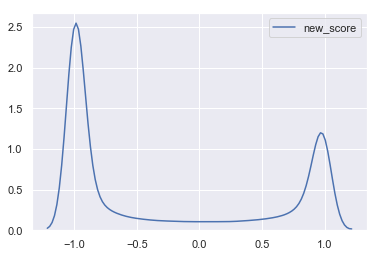

In [20]:
import seaborn as sns 
sns.kdeplot(play_df['new_score'])

In [ ]:
sns.countplot(play_df['new_score'])

In [ ]:
sns.distplot(play_df['new_score'])

In [ ]:
px.scatter?

In [ ]:
#sns.set(rc={'figure.figsize':(30,30)})
ax = sns.scatterplot(x='timestamp', y='new_score', data=play_df)
ax.fig.autofmt_xdate()

In [ ]:
fig = px.scatter(play_df, x='timestamp', y='new_score',color='polarity',
                 title='Time Series scatter', size_max=1)

fig.show() 

__alltime tweets ranking__

In [199]:
#alltime tweets ranking
temp = df.groupby('polarity')\
            .apply(lambda x: x.sort_values(["likes"], ascending = False)).reset_index(drop=True)

negative = temp.loc[temp.polarity == -1].reset_index() 
positive = temp.loc[temp.polarity == 1].reset_index() 


In [197]:
temp.loc[0].screen_name

'realDonaldTrump'

In [196]:
temp.loc[0].text

'Cuomo’s been calling daily, even hourly, begging for everything, most of which should have been the state’s responsibility, such as new hospitals, beds, ventilators, etc. I got it all done for him, and everyone else, and now he seems to want Independence! That won’t happen!'

In [95]:
temp = df.loc[(df.timestamp.dt.month == 3) & (df.timestamp.dt.day == 24) ]\
            .groupby('polarity')
            .apply(lambda x: x.sort_values(["likes"], ascending = False)).reset_index(drop=True)

In [98]:
temp.loc[0].text

'Gov. Cuomo’s daily pressers are clear-eyed, sober, fact-based briefings. Trump’s pressers? When asked by a reporter what data he is relying on to “reopen” the country by Easter, Trump replies, “I just think it’s a beautiful day to reopen government.” We’re in trouble, friends.'

In [99]:
temp.loc[0].score

-0.8463670611381531

In [157]:
temp.loc[1].text

"Here are some things Cuomo hasn't said during his press conference:\n--You're a terrible reporter\n--I take no responsibility\n--I give myself a 10\n--Here, drink this chemical people pour into fishtanks\n--It's the Chinese virus"

In [159]:
temp.loc[2].text

"PLEASE READ: Conditions on Rikers are unimaginably bad. My colleague has spoken to a few people trapped inside. What they told her is horrifying. Unless @NYGovCuomo, @NYCMayor, & all DAs do something ASAP, we're looking at mass death. What they're reporting:"

In [102]:
temp.loc[4].text

' @NYGovCuomo: "FEMA is sending us 400  ventilators....400 ventilators? I need 30,000 ventilators. You want a pat on the back for sending 400 ventilators? What are we going to do with 400 ventilators when we need 30,000 ventilators? You\'re missing the magnitude of the problem."'

In [103]:
temp.loc[5].text

'CUOMO: "My mother is not expendable. And your mother is not expendable. And our brothers and sisters are not expendable. We\'re not going to accept a premise that human life is disposable. We\'re not going to put a dollar figure on human life."'

In [105]:
temp.loc[7].text

'At his Fox News town hall, Trump blamed governors, including Cuomo, for not getting ventilators saying:  “It’s a two-way street. They have to treat us well, too.”\n\nTrump is detached from reality.  He is putting American lives at risk because he is not getting enough compliments?'

In [116]:
positive = temp.loc[temp.polarity == 1].reset_index() 

In [352]:
import flair
sentence = 'Gov Cuomo is a good person. However, he is not a good governor'
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

I0531 20:01:48.547626 4371000768 file_utils.py:39] PyTorch version 1.5.0 available.
I0531 20:01:54.113663 4371000768 file_utils.py:55] TensorFlow version 2.0.0 available.


2020-05-31 20:01:54,779 loading file /Users/udipbohara/.flair/models/sentiment-en-mix-distillbert.pt


I0531 20:01:55.132694 4371000768 configuration_utils.py:285] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-config.json from cache at /Users/udipbohara/.cache/torch/transformers/a41e817d5c0743e29e86ff85edc8c257e61bc8d88e4271bb1b243b6e7614c633.8949e27aafafa845a18d98a0e3a88bc2d248bbc32a1b75947366664658f23b1c
I0531 20:01:55.134248 4371000768 configuration_utils.py:321] Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "vocab_size": 30522
}

I0531 20:01:55.367313 4371000768 tokenization_utils.py:1015] loading file https://s3.amazonaws.com/mod

[NEGATIVE (0.9691)]

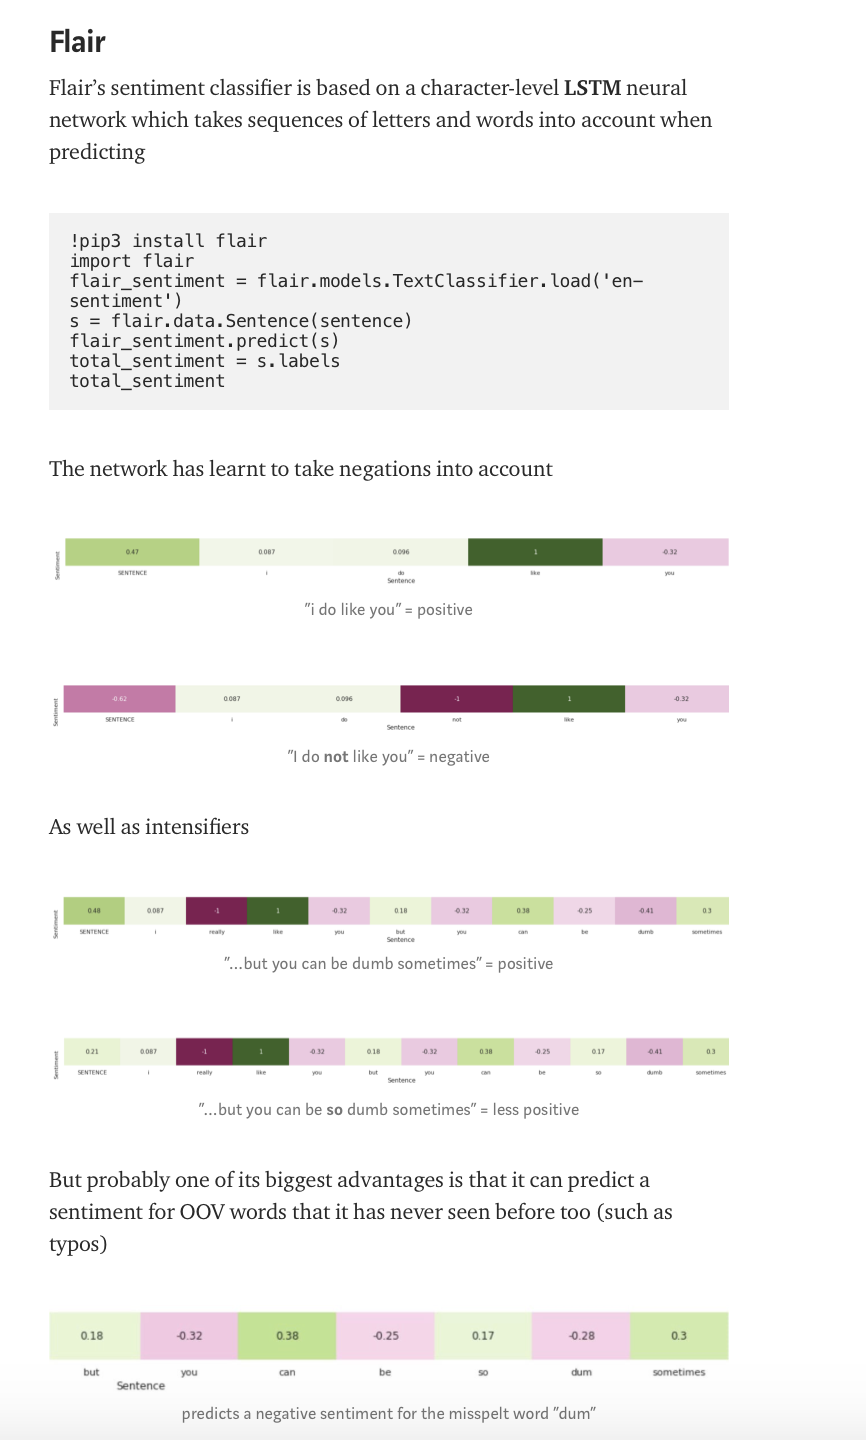

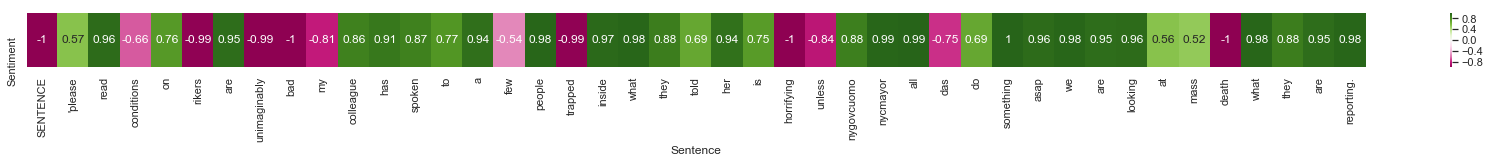

In [356]:
def visualise_sentiments(data):
    fig, ax = plt.subplots(figsize = (30, 1))
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")
    
sentence = "'please read conditions on rikers are unimaginably bad my colleague has spoken to a few people trapped inside what they told her is horrifying unless nygovcuomo nycmayor  all das do something asap we are looking at mass death what they are reporting."
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})

In [154]:
ss 

[Sentence: "Gov."   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.7842)]}],
 Sentence: "Cuomo’s"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.993)]}],
 Sentence: "daily"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.9535)]}],
 Sentence: "pressers"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.8647)]}],
 Sentence: "are"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.9531)]}],
 Sentence: "clear-eyed,"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.9995)]}],
 Sentence: "sober,"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.9954)]}],
 Sentence: "fact-based"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.8493)]}],
 Sentence: "briefings.Trump’s"   [− Tokens: 1  − Sentence-Labels: {'class': [POSITIVE (0.6531)]}],
 Sentence: "pressers?"   [− Tokens: 1  − Sentence-Labels: {'class': [NEGATIVE (0.9865)]}],
 Sentence: "When"   [− Tokens: 1  − Sentence-Labels: {'class': [NEGATIVE (0.7299)]}],
 Sentence: "ask

__Clock plot__ 

In [163]:
def clock_plot_range(date_from, date_to):
    
    clock_df = df[['timestamp','polarity']]
    
    clock_df = clock_df[(clock_df['timestamp'] > date_from )
                        &(clock_df['timestamp'] < date_to)]
    
    clock_df.loc[clock_df.polarity == -1, 'color'] = 'red'
    clock_df.loc[clock_df.polarity == 1, 'color'] = 'blue'
    clock_df.loc[clock_df.polarity == 0, 'color'] = 'green'
    
    def time_to_angle(t, factor = np.pi / 12):
        return (t * factor) % (2 * np.pi)

    def time_to_x_y(t, stretch_x = 1, stretch_y = 1):
        angle_in_rad = time_to_angle(t)
        x, y = np.sin(angle_in_rad), np.cos(angle_in_rad)
        return x, y

    def datetime_to_angle(x):
        return time_to_angle(x.timestamp.hour + x.timestamp.minute / 60)

    clock_df['angle_in_rad'] = clock_df.apply(datetime_to_angle, axis = 1)
    clock_df['x'] = np.sin(clock_df.angle_in_rad)
    clock_df['y'] = np.cos(clock_df.angle_in_rad)

    
    def cleanup_axes(ax):
        for pos, spine in ax.spines.items(): spine.set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    def add_variance(x, variance = 0.28):
        return x + np.random.uniform(low = -variance, high = variance, size=len(clock_df))

    clock_df['x_ran'] = add_variance(clock_df.x)
    clock_df['y_ran'] = add_variance(clock_df.y)


    fig, ax = plt.subplots(figsize = (12, 12))
    clock_df.plot(kind = 'scatter', x = 'x_ran', y = 'y_ran', 
                  ax = ax, s = 10, alpha = 0.6, c = clock_df.color)

    cleanup_axes(ax)

    hour_label_factor = 1.7
    for hour in range(24):
        x, y = time_to_x_y(hour)
        ax.text(x = x / hour_label_factor, y = y / hour_label_factor, 
                s = '{}:00'.format(hour), 
                fontdict={'horizontalalignment': 'center', 
                          'verticalalignment': 'center', 'weight': 'bold', 'size': 10},
                           color = 'black')

    ax.set_title('Tweets per hour for March 20')
    
    #Creating custom legends to show the different websites
    red_patch = mpatches.Patch(color='red', label='Negative')
    blue_patch = mpatches.Patch(color='blue', label='Positive')
    green_patch = mpatches.Patch(color='green', label='Neutral')

    plt.legend(handles=[red_patch,blue_patch,green_patch])

    plt.show()

    fig.tight_layout()
   

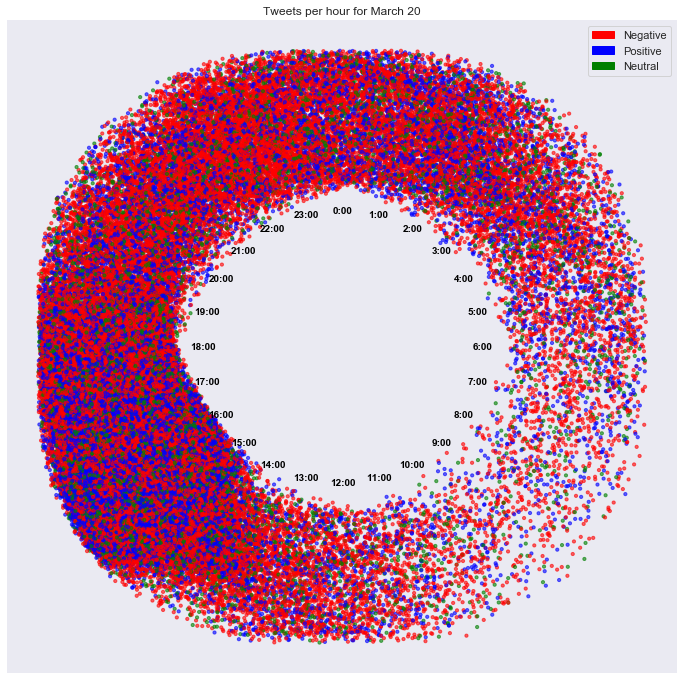

In [225]:
clock_plot_range('03/19/2020', '03/31/2020')

In [192]:
def clock_plot_date(date):

    clock_df = df[['timestamp','polarity']]
    
    clock_df = clock_df.loc[pd.to_datetime(clock_df['timestamp'].dt.date) == date]
  
    clock_df.loc[clock_df.polarity == -1, 'color'] = 'red'
    clock_df.loc[clock_df.polarity == 1, 'color'] = 'blue'
    clock_df.loc[clock_df.polarity == 0, 'color'] = 'green'
    
    def time_to_angle(t, factor = np.pi / 12):
        return (t * factor) % (2 * np.pi)

    def time_to_x_y(t, stretch_x = 1, stretch_y = 1):
        angle_in_rad = time_to_angle(t)
        x, y = np.sin(angle_in_rad), np.cos(angle_in_rad)
        return x, y

    def datetime_to_angle(x):
        return time_to_angle(x.timestamp.hour + x.timestamp.minute / 60)

    clock_df['angle_in_rad'] = clock_df.apply(datetime_to_angle, axis = 1)
    clock_df['x'] = np.sin(clock_df.angle_in_rad)
    clock_df['y'] = np.cos(clock_df.angle_in_rad)

    #hiding the spines of the axes
    def cleanup_axes(ax):
        for pos, spine in ax.spines.items(): spine.set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    def add_variance(x, variance = 0.28):
        return x + np.random.uniform(low = -variance, high = variance, size=len(clock_df))

    clock_df['x_ran'] = add_variance(clock_df.x)
    clock_df['y_ran'] = add_variance(clock_df.y)


    fig, ax = plt.subplots(figsize = (10, 10))
    clock_df.plot(kind = 'scatter', x = 'x_ran', y = 'y_ran', 
                  ax = ax, s = 3, alpha = 0.6, c = clock_df.color)

    cleanup_axes(ax)

    hour_label_factor = 1.7
    for hour in range(24):
        x, y = time_to_x_y(hour)
        ax.text(x = x / hour_label_factor, y = y / hour_label_factor, 
                s = '{}:00'.format(hour), 
                fontdict={'horizontalalignment': 'center', 
                          'verticalalignment': 'center', 'weight': 'bold', 'size': 10},
                           color = 'black')

    ax.set_title('Tweets per hour for March 24')
    
    #Creating custom legends to show the different websites
    red_patch = mpatches.Patch(color='red', label='Negative')
    blue_patch = mpatches.Patch(color='blue', label='Positive')
    green_patch = mpatches.Patch(color='green', label='Neutral')

    plt.legend(handles=[red_patch,blue_patch,green_patch])

   # plt.show()

    #fig.tight_layout()
   # plt.savefig('testing_png.png', dpi=100)

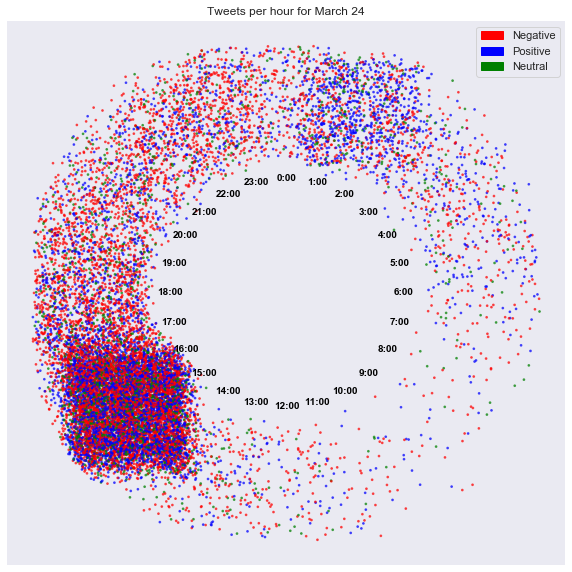

In [193]:
clock_plot_date('03/24/2020')

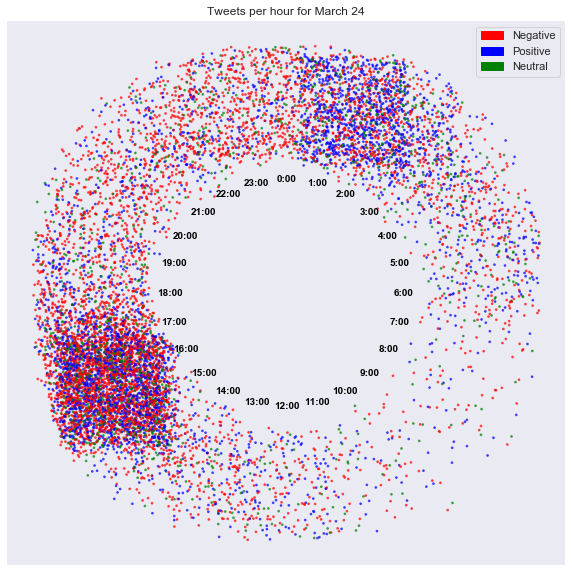

In [360]:
clock_plot_date('03/31/2020')

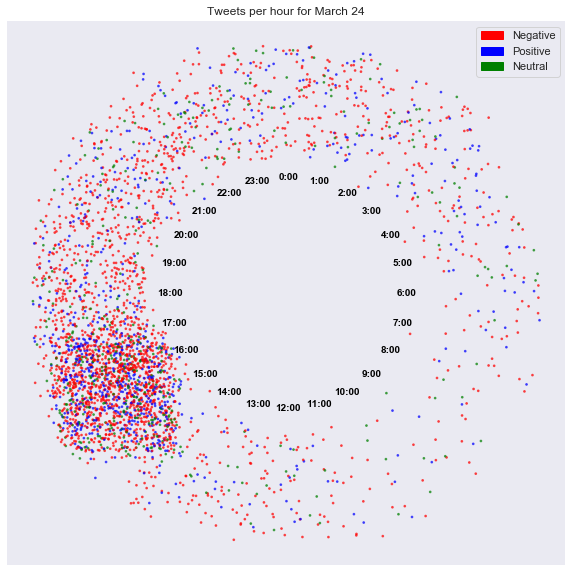

In [363]:
clock_plot_date('04/11/2020')